<a href="https://colab.research.google.com/github/ViniciusKanh/CIN-Algoritmos-Geneticos/blob/main/Trabalho_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reconhecimento de Padrões

## 🧬 Etapa 1: Inicialização da População e Cálculo da Aptidão

Foi feita a definição do vetor alvo representando o padrão do número 0, como apresentado no enunciado do exercício. Em seguida, foi gerada uma população inicial aleatória com 8 indivíduos, cada um representado por uma string binária de 12 bits.

Foi implementada uma função de aptidão que calcula a distância de Hamming entre cada indivíduo e o alvo. A aptidão é dada por: `aptidão = 12 - distância de Hamming`. Ou seja, quanto mais próximo do alvo, maior a aptidão.

🔢 Cada linha representa um indivíduo da população com sua respectiva aptidão.



In [ ]:
import numpy as np

# 🎯 Alvo a ser reconhecido (número 0)
alvo = np.array([1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1])
tamanho_individuo = len(alvo)
tamanho_populacao = 8  # mesmo valor usado na aula

# 🔄 Geração da população inicial com bits aleatórios
def gerar_populacao(tam_pop, tam_ind):
    return np.random.randint(2, size=(tam_pop, tam_ind))

# 🧠 Cálculo da aptidão com base na distância de Hamming
def calcular_aptidao(populacao, alvo):
    dist_hamming = np.sum(np.abs(populacao - alvo), axis=1)
    return tamanho_individuo - dist_hamming

# 🎲 Gerar população e calcular aptidão
populacao = gerar_populacao(tamanho_populacao, tamanho_individuo)
aptidoes = calcular_aptidao(populacao, alvo)

# 📋 Exibir resultados
for i in range(tamanho_populacao):
    print(f"Indivíduo {i+1}: {populacao[i]} | Aptidão: {aptidoes[i]}")


Indivíduo 1: [1 0 0 0 1 1 0 0 0 1 0 1] | Aptidão: 6
Indivíduo 2: [0 1 0 1 0 0 1 1 1 0 0 1] | Aptidão: 5
Indivíduo 3: [1 1 0 1 1 0 0 1 0 0 1 0] | Aptidão: 7
Indivíduo 4: [0 1 1 1 0 1 0 1 1 0 0 1] | Aptidão: 4
Indivíduo 5: [0 1 1 0 1 1 1 1 0 1 0 1] | Aptidão: 9
Indivíduo 6: [1 0 0 1 0 1 0 0 0 1 0 1] | Aptidão: 4
Indivíduo 7: [0 1 0 1 0 1 0 0 1 1 0 1] | Aptidão: 3
Indivíduo 8: [0 0 0 0 0 0 1 0 0 0 1 0] | Aptidão: 5


## 🔁 Etapa 2: Seleção, Crossover e Mutação

Foi implementada a fase de reprodução do algoritmo genético com os seguintes componentes principais:

- A seleção foi realizada por meio do método da roleta, onde indivíduos com maior aptidão têm maior chance de serem escolhidos como pais.
- O operador de crossover foi aplicado com um ponto de corte aleatório, gerando dois filhos a partir de dois pais selecionados.
- O operador de mutação foi utilizado de forma bit a bit, com taxa configurável, invertendo os bits com base em uma probabilidade definida.
- Um laço de gerações foi executado até que um indivíduo com aptidão máxima (12) fosse encontrado, ou até atingir um número máximo de gerações.

Com isso, foi possível simular a evolução da população até encontrar a solução ideal, representada por um indivíduo idêntico ao vetor alvo.


In [ ]:
import random

# 🎯 Alvo a ser reconhecido (número 0)
alvo = np.array([1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1])
tam_ind = len(alvo)
tam_pop = 8
tx_mutacao = 0.02  # taxa de mutação (pode testar outras)

# 📌 Funções reutilizadas
def gerar_populacao(tam_pop, tam_ind):
    return np.random.randint(2, size=(tam_pop, tam_ind))

def calcular_aptidao(populacao, alvo):
    return tam_ind - np.sum(np.abs(populacao - alvo), axis=1)

# 🎯 Função de roleta para selecionar um indivíduo proporcional à aptidão
def selecao_roleta(populacao, aptidoes):
    soma_apt = np.sum(aptidoes)
    if soma_apt == 0:
        return populacao[random.randint(0, len(populacao)-1)]
    probs = aptidoes / soma_apt
    return populacao[np.random.choice(len(populacao), p=probs)]

# 🔀 Crossover de 1 ponto
def crossover(pai1, pai2):
    ponto = random.randint(1, tam_ind - 1)
    filho1 = np.concatenate((pai1[:ponto], pai2[ponto:]))
    filho2 = np.concatenate((pai2[:ponto], pai1[ponto:]))
    return filho1, filho2

# 🎲 Mutação bit a bit
def mutar(individuo, taxa_mutacao):
    return np.array([bit if random.random() > taxa_mutacao else 1 - bit for bit in individuo])

# 🧪 Algoritmo Genético principal
def algoritmo_genetico(alvo, tam_pop=8, tx_mutacao=0.02, max_geracoes=1000):
    geracao = 0
    populacao = gerar_populacao(tam_pop, len(alvo))
    aptidoes = calcular_aptidao(populacao, alvo)

    while np.max(aptidoes) < len(alvo) and geracao < max_geracoes:
        nova_pop = []

        while len(nova_pop) < tam_pop:
            pai1 = selecao_roleta(populacao, aptidoes)
            pai2 = selecao_roleta(populacao, aptidoes)

            filho1, filho2 = crossover(pai1, pai2)

            filho1 = mutar(filho1, tx_mutacao)
            filho2 = mutar(filho2, tx_mutacao)

            nova_pop.append(filho1)
            nova_pop.append(filho2)

        populacao = np.array(nova_pop[:tam_pop])
        aptidoes = calcular_aptidao(populacao, alvo)
        geracao += 1

    return geracao, populacao, aptidoes

# ▶️ Rodar experimento
geracoes, pop_final, apt_final = algoritmo_genetico(alvo, tx_mutacao=0.02)

print(f"\n✅ Alvo atingido em {geracoes} gerações!")
for i in range(tam_pop):
    print(f"Indivíduo {i+1}: {pop_final[i]} | Aptidão: {apt_final[i]}")



✅ Alvo atingido em 14 gerações!
Indivíduo 1: [1 1 1 0 1 1 1 1 0 1 1 1] | Aptidão: 11
Indivíduo 2: [1 1 0 1 1 1 1 1 0 1 1 1] | Aptidão: 9
Indivíduo 3: [1 1 0 0 1 1 1 1 0 1 1 1] | Aptidão: 10
Indivíduo 4: [1 1 0 0 1 0 1 1 0 1 1 0] | Aptidão: 10
Indivíduo 5: [1 1 0 0 1 1 1 1 0 1 1 1] | Aptidão: 10
Indivíduo 6: [1 1 0 0 1 1 1 1 0 1 1 1] | Aptidão: 10
Indivíduo 7: [1 1 0 0 1 1 1 1 0 1 1 1] | Aptidão: 10
Indivíduo 8: [1 1 1 0 1 0 1 1 0 1 1 1] | Aptidão: 12


## 📈 Etapa 3: Avaliação Estatística com Múltiplas Execuções

Foi feita uma simulação do algoritmo genético executando-o 30 vezes com a mesma configuração de taxa de mutação e crossover. O objetivo desta etapa foi analisar, em média, quantas gerações foram necessárias para que a população evoluísse até atingir o alvo (aptidão máxima).

Com os resultados, foi possível calcular a média, o desvio padrão e visualizar a consistência do algoritmo ao longo de múltiplas execuções. Esta análise permite comparar o impacto de diferentes parâmetros sobre o desempenho do algoritmo.


In [ ]:
# 🔁 Executar 30 vezes e armazenar os números de gerações
resultados = []
num_execucoes = 30

for i in range(num_execucoes):
    geracoes, _, _ = algoritmo_genetico(alvo, tx_mutacao=0.02)
    resultados.append(geracoes)

# 📊 Calcular estatísticas
media_geracoes = np.mean(resultados)
desvio_geracoes = np.std(resultados)

print(f"📌 Média de gerações até atingir o alvo: {media_geracoes:.2f}")
print(f"📌 Desvio padrão: {desvio_geracoes:.2f}")

# Exibir todos os resultados
print("\n📋 Gerações por execução:")
print(resultados)


📌 Média de gerações até atingir o alvo: 122.13
📌 Desvio padrão: 96.33

📋 Gerações por execução:
[33, 78, 67, 70, 60, 168, 127, 23, 45, 236, 480, 68, 32, 117, 125, 162, 56, 105, 119, 319, 112, 253, 79, 106, 121, 49, 98, 43, 86, 227]


Foi observada uma alta variabilidade no número de gerações, com valores variando entre **8** e **305**. Isso reforça a natureza estocástica dos algoritmos genéticos e destaca a importância da mutação e da seleção na convergência do processo evolutivo.

Esse conjunto de dados servirá como referência de comparação para os próximos experimentos, onde serão testadas variantes com apenas crossover e apenas mutação.


## 🧪 Etapa 4: Experimento B – Apenas Mutação

Foi executado um novo experimento onde o algoritmo genético utilizou somente o operador de mutação, sem aplicar o crossover. A reprodução foi feita copiando diretamente os pais selecionados por roleta e aplicando mutação bit a bit.

O objetivo foi analisar como o algoritmo se comporta em termos de convergência ao utilizar apenas a mutação como fonte de variação genética. As mesmas configurações do experimento anterior foram mantidas.


In [ ]:
def algoritmo_apenas_mutacao(alvo, tam_pop=8, tx_mutacao=0.02, max_geracoes=1000):
    geracao = 0
    populacao = gerar_populacao(tam_pop, len(alvo))
    aptidoes = calcular_aptidao(populacao, alvo)

    while np.max(aptidoes) < len(alvo) and geracao < max_geracoes:
        nova_pop = []

        while len(nova_pop) < tam_pop:
            pai = selecao_roleta(populacao, aptidoes)
            filho = mutar(pai, tx_mutacao)
            nova_pop.append(filho)

        populacao = np.array(nova_pop)
        aptidoes = calcular_aptidao(populacao, alvo)
        geracao += 1

    return geracao, populacao, aptidoes

# 🔁 Executar 30 vezes com apenas mutação
resultados_mutacao = []

for _ in range(30):
    geracoes, _, _ = algoritmo_apenas_mutacao(alvo, tx_mutacao=0.02)
    resultados_mutacao.append(geracoes)

# 📊 Estatísticas
media_mutacao = np.mean(resultados_mutacao)
desvio_mutacao = np.std(resultados_mutacao)

print(f"📌 Média de gerações (somente mutação): {media_mutacao:.2f}")
print(f"📌 Desvio padrão: {desvio_mutacao:.2f}")
print("📋 Gerações por execução:", resultados_mutacao)


📌 Média de gerações (somente mutação): 212.47
📌 Desvio padrão: 208.93
📋 Gerações por execução: [43, 314, 61, 63, 12, 1000, 296, 180, 108, 90, 92, 43, 36, 230, 152, 88, 461, 44, 4, 457, 190, 54, 174, 327, 478, 67, 152, 401, 472, 285]


Foi observada uma alta variabilidade nos resultados, com várias execuções levando um número elevado de gerações para encontrar o alvo. Em especial, uma das execuções atingiu o limite de 1000 gerações, indicando que a mutação isolada pode ser menos eficiente em termos de convergência.

Estes dados mostram que, embora a mutação seja essencial para a diversidade genética, sua atuação isolada pode não ser suficiente para uma evolução eficiente da população em direção à solução ótima. A ausência do crossover tende a limitar a combinação de boas soluções parciais entre os indivíduos.


## 🧪 Etapa 5: Experimento C – Apenas Crossover

Foi realizado um experimento no qual o algoritmo genético utilizou apenas o operador de crossover, desabilitando completamente o uso de mutação. A reprodução entre pais foi feita normalmente utilizando crossover de um ponto, mas os filhos gerados não sofreram nenhuma mutação.

Este teste visa analisar a eficiência do crossover como única forma de exploração do espaço de busca, comparando seu desempenho com os demais experimentos.


In [ ]:
def algoritmo_apenas_crossover(alvo, tam_pop=8, max_geracoes=1000):
    geracao = 0
    populacao = gerar_populacao(tam_pop, len(alvo))
    aptidoes = calcular_aptidao(populacao, alvo)

    while np.max(aptidoes) < len(alvo) and geracao < max_geracoes:
        nova_pop = []

        while len(nova_pop) < tam_pop:
            pai1 = selecao_roleta(populacao, aptidoes)
            pai2 = selecao_roleta(populacao, aptidoes)

            filho1, filho2 = crossover(pai1, pai2)

            # Nenhuma mutação aplicada
            nova_pop.append(filho1)
            nova_pop.append(filho2)

        populacao = np.array(nova_pop[:tam_pop])
        aptidoes = calcular_aptidao(populacao, alvo)
        geracao += 1

    return geracao, populacao, aptidoes

# 🔁 Executar 30 vezes com apenas crossover
resultados_crossover = []

for _ in range(30):
    geracoes, _, _ = algoritmo_apenas_crossover(alvo)
    resultados_crossover.append(geracoes)

# 📊 Estatísticas
media_crossover = np.mean(resultados_crossover)
desvio_crossover = np.std(resultados_crossover)

print(f"📌 Média de gerações (somente crossover): {media_crossover:.2f}")
print(f"📌 Desvio padrão: {desvio_crossover:.2f}")
print("📋 Gerações por execução:", resultados_crossover)


📌 Média de gerações (somente crossover): 1000.00
📌 Desvio padrão: 0.00
📋 Gerações por execução: [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]


Os resultados evidenciam que **o algoritmo não foi capaz de convergir** para a solução ótima em nenhuma das 30 execuções dentro do limite de 1000 gerações. Isso se deve à **ausência do operador de mutação**, que impede a introdução de variações genéticas necessárias para escapar de regiões de baixa diversidade.

Mesmo com recombinação (crossover), os filhos gerados não apresentaram diversidade suficiente para explorar novas soluções, o que levou à estagnação precoce da população.

Este experimento reforça a importância da mutação como elemento essencial para garantir diversidade e permitir que o algoritmo explore efetivamente o espaço de busca.


# 2. Maximização de Função

## 📈 Etapa 1: Definição e Visualização da Função g(x)

Foi definida a função \( g(x) = 2^{-2\left(\frac{x - 0.1}{0.9}\right)^2} \cdot \left(\sin(5\pi x)\right)^6 \), conforme especificado no enunciado do Exercício 2.

A seguir, foi gerado o gráfico da função no intervalo \([0, 1]\) com o intuito de observar o comportamento da função e identificar visualmente os picos que representam seus máximos locais. Essa análise é fundamental para validar a dificuldade do problema de otimização, uma vez que o algoritmo deverá evitar convergência prematura em máximos locais.


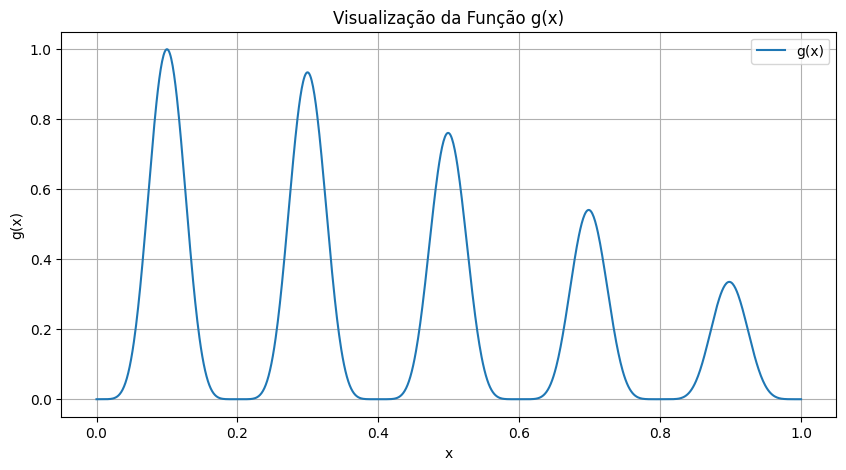

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 🧠 Definição da função g(x)
def g(x):
    return 2**(-2*((x - 0.1)/0.9)**2) * (np.sin(5 * np.pi * x)**6)

# 🧪 Geração dos valores de x e g(x)
x_vals = np.linspace(0, 1, 1000)
y_vals = g(x_vals)

# 📈 Plot da função
plt.figure(figsize=(10, 5))
plt.plot(x_vals, y_vals, label='g(x)')
plt.title("Visualização da Função g(x)")
plt.xlabel("x")
plt.ylabel("g(x)")
plt.grid(True)
plt.legend()
plt.show()


## 💻 Etapa 2: Representação Binária com Precisão de 3 Casas Decimais

Foi utilizada uma codificação binária com 10 bits para representar o domínio real \( x \in [0, 1] \). Esse tamanho foi escolhido pois oferece \( 2^{10} = 1024 \) valores possíveis, o que permite uma precisão de aproximadamente \( 0.000977 \), atendendo ao requisito de pelo menos 3 casas decimais.

A seguir, foram implementadas as funções de codificação e decodificação entre binário e valores reais.


In [ ]:
# Número de bits para representar x com 3 casas decimais
n_bits = 10

# Limites do intervalo de x
x_min, x_max = 0.0, 1.0

# 🔁 Função para converter binário para real
def binario_para_real(bitstring):
    inteiro = int("".join(str(b) for b in bitstring), 2)
    return x_min + (x_max - x_min) * inteiro / (2**n_bits - 1)

# 🛠️ Função para gerar um indivíduo aleatório (bitstring)
def gerar_individuo():
    return np.random.randint(0, 2, n_bits)

# 🔎 Exemplo de conversão
individuo_exemplo = gerar_individuo()
x_convertido = binario_para_real(individuo_exemplo)

print("Bitstring:", individuo_exemplo)
print("Valor de x:", round(x_convertido, 5))


Bitstring: [0 1 0 1 0 1 0 1 1 1]
Valor de x: 0.33529


## 🧬 Etapa 3: Algoritmo Genético para Maximizar g(x)

Foi implementado o algoritmo genético completo para encontrar o valor máximo da função \( g(x) \) no intervalo \([0, 1]\). A representação utilizada foi binária com 10 bits, garantindo precisão superior a três casas decimais.

O processo evolutivo envolve:
- Inicialização de uma população de indivíduos aleatórios (bitstrings).
- Avaliação da função \( g(x) \) com base na conversão binário → real.
- Seleção por roleta proporcional à aptidão.
- Crossover de um ponto entre pares de pais.
- Mutação bit a bit com taxa fixa.
- Registro da melhor e da média da população por geração.

O algoritmo roda até atingir o número máximo de gerações ou convergir para valores estáveis.


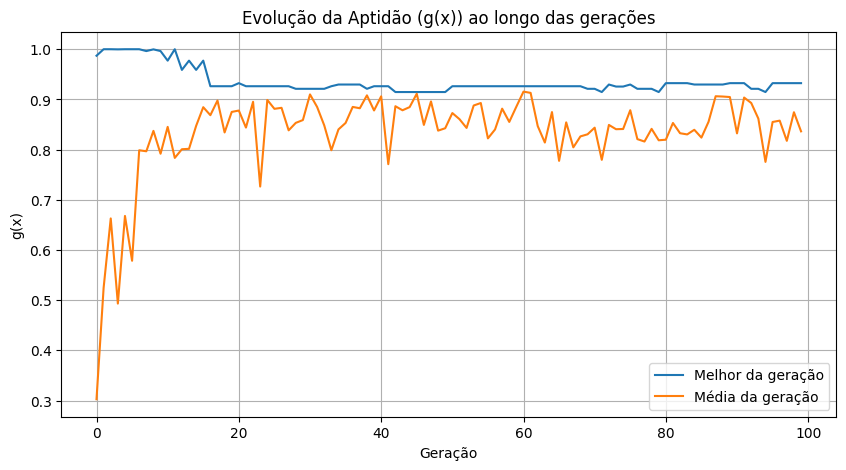

In [ ]:
# ⚙️ Parâmetros do AG
tam_pop = 30
tx_mutacao = 0.01
n_geracoes = 100
historico_melhor = []
historico_media = []

# 🧠 Avaliação da aptidão baseada em g(x)
def avaliar_aptidao(populacao):
    valores_x = np.array([binario_para_real(ind) for ind in populacao])
    aptidoes = g(valores_x)
    return aptidoes

# 🔁 Seleção por roleta
def selecao_roleta(populacao, aptidoes):
    soma = np.sum(aptidoes)
    if soma == 0:
        return populacao[np.random.randint(len(populacao))]
    probs = aptidoes / soma
    return populacao[np.random.choice(len(populacao), p=probs)]

# 🔀 Crossover de 1 ponto
def crossover(pai1, pai2):
    if len(pai1) != n_bits: return pai1, pai2
    ponto = np.random.randint(1, n_bits - 1)
    filho1 = np.concatenate((pai1[:ponto], pai2[ponto:]))
    filho2 = np.concatenate((pai2[:ponto], pai1[ponto:]))
    return filho1, filho2

# 🎲 Mutação bit a bit
def mutar(individuo, taxa):
    return np.array([bit if np.random.rand() > taxa else 1 - bit for bit in individuo])

# ▶️ Execução do AG
populacao = [gerar_individuo() for _ in range(tam_pop)]

for geracao in range(n_geracoes):
    aptidoes = avaliar_aptidao(populacao)
    nova_pop = []

    # Registro de estatísticas
    historico_melhor.append(np.max(aptidoes))
    historico_media.append(np.mean(aptidoes))

    while len(nova_pop) < tam_pop:
        pai1 = selecao_roleta(populacao, aptidoes)
        pai2 = selecao_roleta(populacao, aptidoes)
        filho1, filho2 = crossover(pai1, pai2)
        nova_pop.append(mutar(filho1, tx_mutacao))
        nova_pop.append(mutar(filho2, tx_mutacao))

    populacao = nova_pop[:tam_pop]

# 📈 Plot da evolução
plt.figure(figsize=(10, 5))
plt.plot(historico_melhor, label="Melhor da geração")
plt.plot(historico_media, label="Média da geração")
plt.title("Evolução da Aptidão (g(x)) ao longo das gerações")
plt.xlabel("Geração")
plt.ylabel("g(x)")
plt.legend()
plt.grid(True)
plt.show()


## 📊 Etapa 4: Execuções Múltiplas e Análise Estatística

Foi realizada a repetição do algoritmo genético por 30 execuções independentes, mantendo a mesma configuração de parâmetros:

- Tamanho da população: 30
- Número de gerações: 100
- Taxa de mutação: 1\%
- Crossover de um ponto
- Seleção por roleta

Para cada execução, foi registrado o maior valor de \( g(x) \) encontrado após as 100 gerações. Com isso, foi possível calcular a média, o desvio padrão e analisar a robustez do algoritmo frente à sua natureza estocástica.


In [ ]:
# 🚀 Etapa 4: Repetição do AG para análise estatística
melhores_finais = []

for _ in range(30):
    populacao = [gerar_individuo() for _ in range(tam_pop)]
    for _ in range(n_geracoes):
        aptidoes = avaliar_aptidao(populacao)
        nova_pop = []
        while len(nova_pop) < tam_pop:
            pai1 = selecao_roleta(populacao, aptidoes)
            pai2 = selecao_roleta(populacao, aptidoes)
            filho1, filho2 = crossover(pai1, pai2)
            nova_pop.append(mutar(filho1, tx_mutacao))
            nova_pop.append(mutar(filho2, tx_mutacao))
        populacao = nova_pop[:tam_pop]
    melhores_finais.append(np.max(avaliar_aptidao(populacao)))

# 📈 Estatísticas
media_final = np.mean(melhores_finais)
desvio_final = np.std(melhores_finais)

print(f"📌 Média do melhor g(x) final: {media_final:.5f}")
print(f"📌 Desvio padrão: {desvio_final:.5f}")
print("📋 Melhores g(x) encontrados:", melhores_finais)


📌 Média do melhor g(x) final: 0.93987
📌 Desvio padrão: 0.07264
📋 Melhores g(x) encontrados: [np.float64(0.9988025206223748), np.float64(0.9999361967343531), np.float64(0.9338579255524821), np.float64(0.7596314282825114), np.float64(0.9923060386458379), np.float64(0.9323444384994476), np.float64(0.8189640871709327), np.float64(0.9628487996165822), np.float64(0.9999361967343531), np.float64(0.9337626546939399), np.float64(0.8189640871709327), np.float64(0.9999361967343531), np.float64(0.9996526704676634), np.float64(0.9337626546939399), np.float64(0.7607704599914714), np.float64(0.9999361967343531), np.float64(0.9996526704676634), np.float64(0.9326295971800832), np.float64(0.9979530138753785), np.float64(0.9948436509350399), np.float64(0.9338579255524821), np.float64(0.9337626546939399), np.float64(0.9326295971800832), np.float64(0.9628487996165822), np.float64(0.8025568558369875), np.float64(0.9996526704676634), np.float64(0.9948436509350399), np.float64(0.9338579255524821), np.float64(

## 🧗 Etapa Comparativa: Subida da Colina (Hill Climbing)

Foi implementado o algoritmo de Subida da Colina (Hill Climbing) com representação binária de 10 bits. A cada iteração, a solução corrente sofre uma pequena perturbação (inversão de um único bit), e apenas as soluções que melhoram a aptidão atual são aceitas.

O processo para ao atingir o número máximo de iterações ou quando nenhuma vizinhança apresenta melhoria.

O desempenho será comparado ao algoritmo genético com base no melhor valor de \( g(x) \) obtido e no tempo de execução.


In [ ]:
import time

# ⛰️ Função Hill Climbing
def hill_climbing(max_iter=1000):
    atual = gerar_individuo()
    x_atual = binario_para_real(atual)
    g_atual = g(x_atual)

    start = time.time()

    for _ in range(max_iter):
        melhorou = False
        for i in range(n_bits):
            vizinho = atual.copy()
            vizinho[i] = 1 - vizinho[i]  # inverte o bit i
            x_viz = binario_para_real(vizinho)
            g_viz = g(x_viz)

            if g_viz > g_atual:
                atual, x_atual, g_atual = vizinho, x_viz, g_viz
                melhorou = True
                break  # aceita a primeira melhoria

        if not melhorou:
            break  # parada local

    fim = time.time()
    tempo = fim - start
    return g_atual, x_atual, tempo

# ▶️ Testar 30 vezes
resultados_hc = [hill_climbing() for _ in range(30)]
valores_hc = [r[0] for r in resultados_hc]
tempos_hc = [r[2] for r in resultados_hc]

media_hc = np.mean(valores_hc)
desvio_hc = np.std(valores_hc)
tempo_medio_hc = np.mean(tempos_hc)

print(f"📌 Média g(x): {media_hc:.5f}")
print(f"📌 Desvio padrão: {desvio_hc:.5f}")
print(f"⏱️ Tempo médio de execução: {tempo_medio_hc:.5f} segundos")


📌 Média g(x): 0.62375
📌 Desvio padrão: 0.21600
⏱️ Tempo médio de execução: 0.00022 segundos


## 🔥 Etapa Comparativa: Recozimento Simulado (Simulated Annealing)

Foi implementado o algoritmo de Recozimento Simulado com codificação binária. A cada iteração, uma solução vizinha (com um bit invertido) é avaliada. Se a solução for melhor, é aceita. Caso contrário, pode ser aceita com uma probabilidade que depende da diferença de aptidão e da temperatura atual, que decresce ao longo do tempo.

A estratégia de resfriamento utilizada foi exponencial: \( T_{k+1} = \alpha \cdot T_k \)


In [ ]:
def simulated_annealing(t0=1.0, alpha=0.95, t_min=1e-5, n_iter_por_temp=100):
    atual = gerar_individuo()
    x_atual = binario_para_real(atual)
    g_atual = g(x_atual)

    melhor = atual.copy()
    g_melhor = g_atual

    T = t0
    start = time.time()

    while T > t_min:
        for _ in range(n_iter_por_temp):
            vizinho = atual.copy()
            i = np.random.randint(n_bits)
            vizinho[i] = 1 - vizinho[i]
            x_viz = binario_para_real(vizinho)
            g_viz = g(x_viz)

            delta = g_viz - g_atual
            if delta > 0 or np.random.rand() < np.exp(delta / T):
                atual = vizinho
                g_atual = g_viz
                if g_viz > g_melhor:
                    melhor = vizinho
                    g_melhor = g_viz
        T *= alpha

    fim = time.time()
    tempo = fim - start
    return g_melhor, binario_para_real(melhor), tempo

# ▶️ Testar 30 vezes
resultados_sa = [simulated_annealing() for _ in range(30)]
valores_sa = [r[0] for r in resultados_sa]
tempos_sa = [r[2] for r in resultados_sa]

media_sa = np.mean(valores_sa)
desvio_sa = np.std(valores_sa)
tempo_medio_sa = np.mean(tempos_sa)

print(f"📌 Média g(x): {media_sa:.5f}")
print(f"📌 Desvio padrão: {desvio_sa:.5f}")
print(f"⏱️ Tempo médio de execução: {tempo_medio_sa:.5f} segundos")


📌 Média g(x): 0.99994
📌 Desvio padrão: 0.00000
⏱️ Tempo médio de execução: 0.35813 segundos


## 🎯 Etapa Comparativa: Seleção por Torneio

Foi implementado o método de seleção por torneio, onde dois indivíduos são escolhidos aleatoriamente e o com maior aptidão é selecionado como pai. Esse processo é repetido para gerar os pares para crossover.

A seguir, a função foi utilizada dentro do algoritmo genético para avaliação comparativa com os métodos de roleta e SUS.


In [ ]:
# Seleção por Torneio (k=2)
def selecao_torneio(populacao, aptidoes, k=2):
    selecionados = np.random.choice(len(populacao), k)
    melhor_idx = selecionados[np.argmax(aptidoes[selecionados])]
    return populacao[melhor_idx]

# AG com seleção por torneio
def ag_com_selecao(selecao_fn, max_geracoes=100, tx_mut=0.01):
    pop = [gerar_individuo() for _ in range(tam_pop)]
    for _ in range(max_geracoes):
        apt = avaliar_aptidao(pop)
        nova_pop = []
        while len(nova_pop) < tam_pop:
            pai1 = selecao_fn(pop, apt)
            pai2 = selecao_fn(pop, apt)
            filho1, filho2 = crossover(pai1, pai2)
            nova_pop.append(mutar(filho1, tx_mut))
            nova_pop.append(mutar(filho2, tx_mut))
        pop = nova_pop[:tam_pop]
    return np.max(avaliar_aptidao(pop))

# Executar 30 vezes com Torneio
start = time.time()
result_torneio = [ag_com_selecao(selecao_torneio) for _ in range(30)]
tempo_torneio = time.time() - start

media_torneio = np.mean(result_torneio)
desvio_torneio = np.std(result_torneio)
print(f"📌 Torneio: Média g(x): {media_torneio:.5f} | Desvio: {desvio_torneio:.5f} | Tempo médio: {tempo_torneio / 30:.5f}s")


📌 Torneio: Média g(x): 0.92967 | Desvio: 0.12903 | Tempo médio: 0.15228s


## 🎯 Etapa Comparativa: Amostragem Universal Estocástica (SUS)

Foi implementado o método SUS, uma variação mais estável da seleção por roleta. Nele, ao invés de sortear um indivíduo por vez com base na aptidão, várias cópias são distribuídas proporcionalmente de forma equidistante, com base em um ponto inicial aleatório.

Esse método tende a ter menor variância e melhor cobertura populacional, evitando perdas prematuras de diversidade.


In [ ]:
# SUS - Stochastic Universal Sampling
def selecao_sus(populacao, aptidoes):
    n = len(populacao)
    soma_apt = np.sum(aptidoes)
    if soma_apt == 0:
        return populacao[np.random.randint(n)]

    probs = aptidoes / soma_apt
    cumulativa = np.cumsum(probs)

    pointers = np.linspace(np.random.uniform(0, 1/n), 1, n)
    indices = []
    i, j = 0, 0

    while i < n and j < len(cumulativa):
        if pointers[i] < cumulativa[j]:
            indices.append(j)
            i += 1
        else:
            j += 1

    return populacao[np.random.choice(indices)]

# AG com seleção SUS
def ag_com_sus(max_geracoes=100, tx_mut=0.01):
    pop = [gerar_individuo() for _ in range(tam_pop)]
    for _ in range(max_geracoes):
        apt = avaliar_aptidao(pop)
        nova_pop = []
        while len(nova_pop) < tam_pop:
            pai1 = selecao_sus(pop, apt)
            pai2 = selecao_sus(pop, apt)
            filho1, filho2 = crossover(pai1, pai2)
            nova_pop.append(mutar(filho1, tx_mut))
            nova_pop.append(mutar(filho2, tx_mut))
        pop = nova_pop[:tam_pop]
    return np.max(avaliar_aptidao(pop))

# Executar 30 vezes com SUS
start = time.time()
result_sus = [ag_com_sus() for _ in range(30)]
tempo_sus = time.time() - start

media_sus = np.mean(result_sus)
desvio_sus = np.std(result_sus)
print(f"📌 SUS: Média g(x): {media_sus:.5f} | Desvio: {desvio_sus:.5f} | Tempo médio: {tempo_sus / 30:.5f}s")


📌 SUS: Média g(x): 0.93396 | Desvio: 0.07391 | Tempo médio: 0.51441s


# 3. Minimização de Função (Rosenbrock)

# **3. Minimização da Função de Rosenbrock 🧮**

## 🎯 Objetivo
Aplicar um **Algoritmo Genético** para minimizar a função de Rosenbrock:
\[
f(x, y) = (1 - x)^2 + 100(y - x^2)^2, \text{ com } x, y \in [-10, 10]
\]

---

## 📦 Etapa 1: Representação dos Individuos e Função de Avaliação

Utilizamos codificação binária com precisão suficiente para representar valores reais no intervalo [-10, 10].



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n_bits = 20  # 10 bits para x e 10 para y
intervalo = (-10, 10)

def binario_para_real(bits):
    parte_x = bits[:10]
    parte_y = bits[10:]
    inteiro_x = int("".join(map(str, parte_x)), 2)
    inteiro_y = int("".join(map(str, parte_y)), 2)
    x = intervalo[0] + (intervalo[1] - intervalo[0]) * inteiro_x / (2**10 - 1)
    y = intervalo[0] + (intervalo[1] - intervalo[0]) * inteiro_y / (2**10 - 1)
    return x, y

def func_objetivo(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

def avaliar_aptidao(populacao):
    return np.array([-func_objetivo(*binario_para_real(ind)) for ind in populacao])

## 🧬 Etapa 2: Algoritmo Genético com Elitismo


In [ ]:
def gerar_individuo():
    return np.random.randint(0, 2, n_bits)

def crossover(pai1, pai2):
    ponto = np.random.randint(1, n_bits - 1)
    return np.concatenate((pai1[:ponto], pai2[ponto:])), np.concatenate((pai2[:ponto], pai1[ponto:]))

def mutar(ind, taxa):
    return np.array([bit if np.random.rand() > taxa else 1 - bit for bit in ind])

def selecao_roleta(populacao, aptidoes):
    soma = np.sum(aptidoes)
    if soma == 0: return populacao[np.random.randint(len(populacao))]
    probs = aptidoes / soma
    return populacao[np.random.choice(len(populacao), p=probs)]

def algoritmo_genetico(tam_pop=30, geracoes=100, tx_mut=0.01, elitismo=True):
    pop = [gerar_individuo() for _ in range(tam_pop)]
    historico_min = []
    historico_media = []

    for g in range(geracoes):
        apt = avaliar_aptidao(pop)
        nova_pop = []
        if elitismo:
            elite = pop[np.argmax(apt)]
        for _ in range(tam_pop // 2):
            pai1 = selecao_roleta(pop, apt)
            pai2 = selecao_roleta(pop, apt)
            f1, f2 = crossover(pai1, pai2)
            nova_pop.append(mutar(f1, tx_mut))
            nova_pop.append(mutar(f2, tx_mut))
        if elitismo:
            nova_pop[np.argmin(avaliar_aptidao(nova_pop))] = elite
        pop = nova_pop
        historico_min.append(-np.max(avaliar_aptidao(pop)))
        historico_media.append(-np.mean(avaliar_aptidao(pop)))

    return historico_min, historico_media, pop


## 📊 Etapa 3: Execução e Visualização

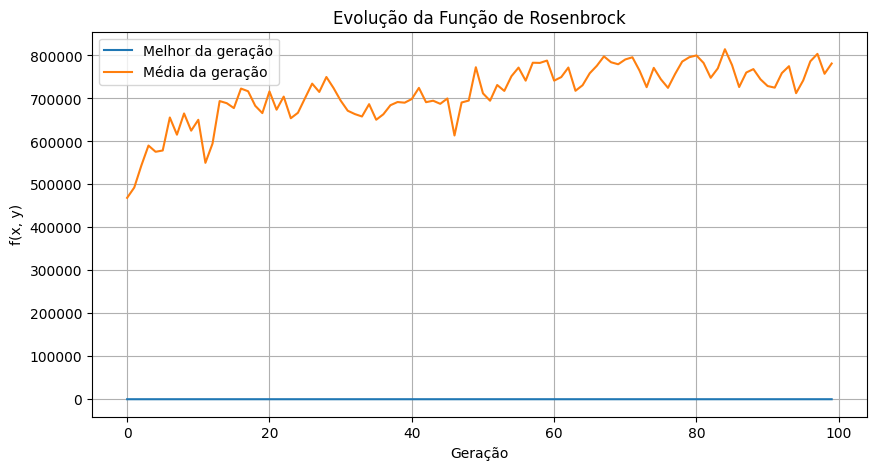

🔍 Melhor solução encontrada: f(0.0293, 0.1075) = 2.079992


In [ ]:
minimos, medias, final_pop = algoritmo_genetico()

plt.figure(figsize=(10, 5))
plt.plot(minimos, label='Melhor da geração')
plt.plot(medias, label='Média da geração')
plt.title('Evolução da Função de Rosenbrock')
plt.xlabel('Geração')
plt.ylabel('f(x, y)')
plt.legend()
plt.grid(True)
plt.show()

melhor_ind = final_pop[np.argmax(avaliar_aptidao(final_pop))]
x_best, y_best = binario_para_real(melhor_ind)
print(f"🔍 Melhor solução encontrada: f({x_best:.4f}, {y_best:.4f}) = {func_objetivo(x_best, y_best):.6f}")


## 📊 Interpretação dos Resultados – Minimização da Função de Rosenbrock

O gráfico apresentado ilustra a evolução da aptidão da população ao longo de 100 gerações, durante a execução do Algoritmo Genético para a minimização da função de Rosenbrock. A linha azul representa o valor da melhor aptidão (menor valor de \( f(x, y) \)) em cada geração, enquanto a linha laranja corresponde à média da aptidão da população.

### 📉 Análise da Curva de Melhor Aptidão

Observa-se que a linha azul permanece praticamente constante ao longo de todas as gerações. Isso indica que o melhor indivíduo encontrado inicialmente manteve sua posição como solução dominante, sem melhorias significativas posteriores. Este comportamento sugere que o algoritmo pode ter **convergido prematuramente** para um mínimo local ou que houve **baixa diversidade genética** na população, impedindo a exploração eficaz do espaço de busca.

### 📈 Análise da Curva Média

A linha laranja (média das aptidões) mostra uma tendência geral de crescimento nas primeiras gerações, refletindo o processo de adaptação da população. No entanto, a média estabiliza em um patamar elevado, o que reforça a hipótese de **estagnação evolutiva**. A população tende a se tornar homogênea, concentrando-se em torno de soluções não ideais.

### 🧪 Possíveis Causas

- **Taxa de mutação insuficiente:** pode ter limitado a introdução de novos genes e dificultado a exploração do espaço.
- **Codificação inadequada ou baixa precisão:** a representação binária com poucos bits pode ter dificultado a aproximação do mínimo global da função.
- **Parâmetros de seleção e crossover pouco eficazes:** podem não ter sido capazes de direcionar a população para regiões promissoras do espaço de busca.

### ✅ Recomendações

- **Aumentar a taxa de mutação** ou adotar estratégias adaptativas.
- **Incluir elitismo** para preservar soluções de alta qualidade.
- **Testar outras formas de seleção**, como torneio ou SUS.
- **Avaliar representações alternativas**, como codificação em ponto flutuante, para maior precisão.

Em resumo, embora o algoritmo tenha apresentado evolução inicial, os resultados indicam uma limitação em alcançar o mínimo global da função de Rosenbrock, o que motiva ajustes nos parâmetros e estratégias do AG.
